# Первый computational notebook

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

Каждый пронумерованный элемент будет представлять собой новую ячейку. Нажмите `SHIFT
+ENTER`, чтобы запустить ячейку и создать новую ячейку ниже. Выбрав ячейку, нажмите
`ESCAPE` для перехода в командный режим. Используйте клавиши `M` и `Y` для изменения ячеек
на разметку и код.

1. Создайте новый блокнот , назовите его и добавьте заголовок (ячейку в формате
markdown ниже).

2. Зафиксируйте соответствующие формулы в новой ячейке (ячейке с Markdown):

## Формулы
- площадь квадрата: $s = (2 r)^2$
- площадь круга: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

3. Добавьте изображение для пояснения концепции (ячейка markdown):


![Дротики](https://camo.githubusercontent.com/99fe6618136e0ba6c65b95ea784874d3d9393929b844f8223cd11f55bc8d56e9/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f636f6465726566696e6572792f6a7570797465722f6d61696e2f6578616d706c652f64617274732e737667)

4. Импортируйте два модуля, которые нам понадобятся (ячейка с кодом):

In [12]:
!python3 -m pip install matplotlib
import random
import matplotlib.pyplot as plt


Python 


5. Инициализируйте количество точек (ячейка с кодом):

In [13]:
num_points = 204800

6. Броски дротиков (ячейка с кодом):

In [14]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits +=1
        points.append((x,y, "blue"))
    else:
        points.append((x,y, "purple"))

7. Построение графика результатов (ячейка с кодом):

3.1410546875

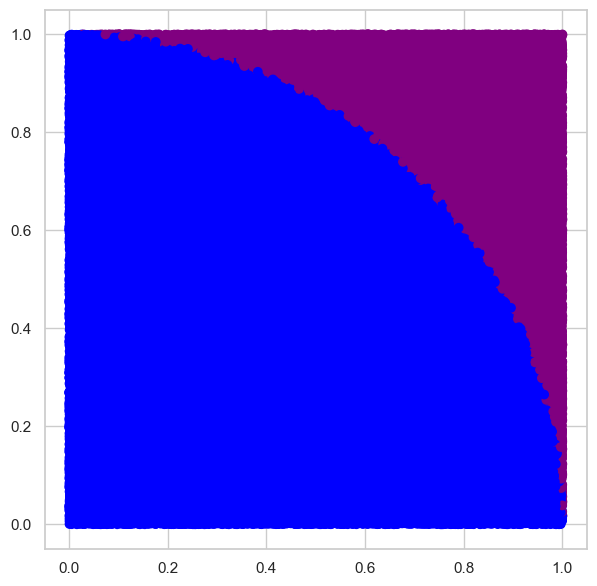

In [15]:
x, y, colors = zip(*points)
fig, ax = plt.subplots()
fig.set_size_inches(7.0,7.0)

ax.scatter(x, y, c=colors)

fraction = hits / num_points
4 * fraction

8. Вычислите оценку для pi (ячейка с кодом):

In [16]:

print("Оценка числа π = ", 4*fraction)


Оценка числа π =  3.1410546875


In [17]:
!python3 -m pip install pandas matplotlib
!python3 -m pip install pandas matplotlib seaborn
!python3 -m pip install ipywidgets

Python 
Python 
Python 


In [18]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme(style="whitegrid")
from itertools import cycle

## Метод Монте-Карло через функции

In [19]:
from matplotlib import pyplot 
import random
from ipywidgets import interact, widgets

In [20]:
%matplotlib inline


def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

## Виджеты


interactive(children=(IntSlider(value=10000, description='num_points', max=10000, min=100, step=1000), Output(…

<function __main__.experiment(num_points)>

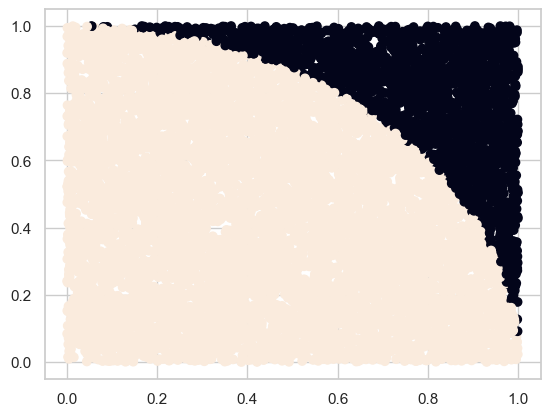

In [21]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=1000,
value=204800))

### Виджеты для интерактивной подгонки данных (data fitting)

Виджеты - это довольно интересны инструмент сам по себе, но они также могут быть и
полезными. Ниже пример, показывающий, как можно в интерактивном режиме подгонять
шумные данные (noisy data).

1. Выполните приведенную ниже ячейку. Она подгоняет полином 5-го порядка к гауссовой
функции с некоторым случайным шумом
2. Используйте декоратор @interact вокруг двух последних строк кода, чтобы можно было
визуализировать подгонки с полиномиальными порядками в диапазоне, скажем, от 3 до 30:

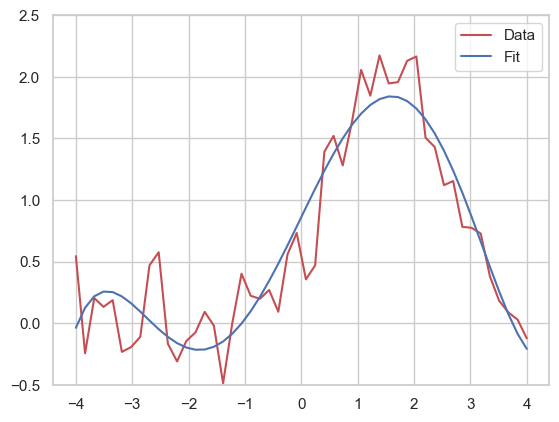

In [22]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -4 <= x <= 4
    nx = 50
    x = np.linspace(-4.0, 4.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
yfit = fit(x, y, n=5)  # fit a 5th order polynomial to it
plot(x, y, yfit)